In [1]:
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt

In [2]:
os.chdir(r"E:\MY\Project\Santander Customer Transaction")


In [3]:
Train = pd.read_csv("Train1.csv", header=0,encoding = 'unicode_escape')



In [4]:
Test= pd.read_csv("test.csv", header=0,encoding = 'unicode_escape')


In [5]:
Train.shape, Test.shape

((200000, 202), (200000, 201))

In [6]:
Train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [7]:
Train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

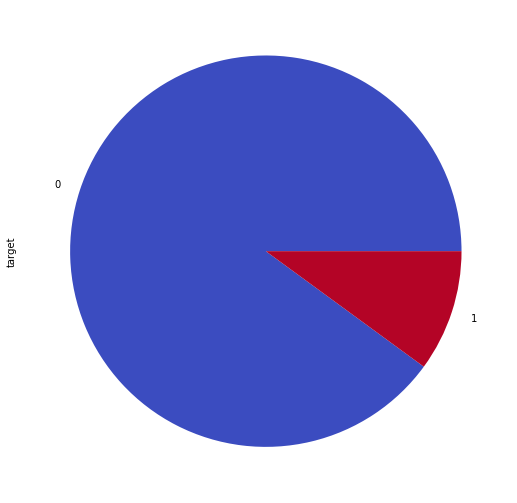

In [8]:
Train['target'].value_counts().plot(kind="pie", figsize=(12,9), colormap="coolwarm")

In [9]:
#### check for missing data

Train.isna().sum().sum()


0

In [10]:
Test.isna().sum().sum()

0

In [11]:
import gc


In [12]:
gc.collect();
#Train.describe()

In [13]:
numerical_features = Train.columns[2:]

Distributions columns


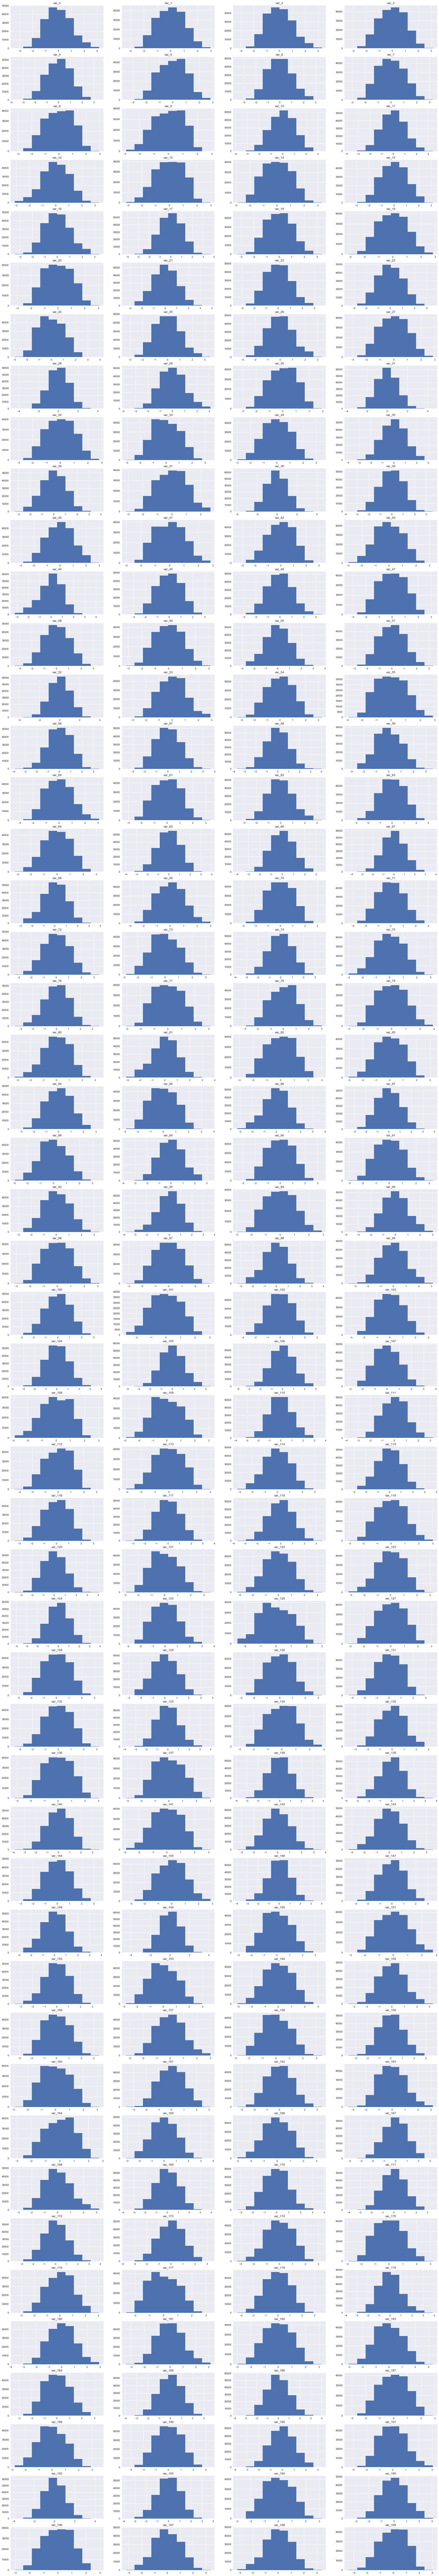

In [30]:
print('Distributions columns')
plt.figure(figsize=(30, 185))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 4, i + 1)
    plt.hist(Train[col]) 
    plt.title(col)
gc.collect();

Distributions columns


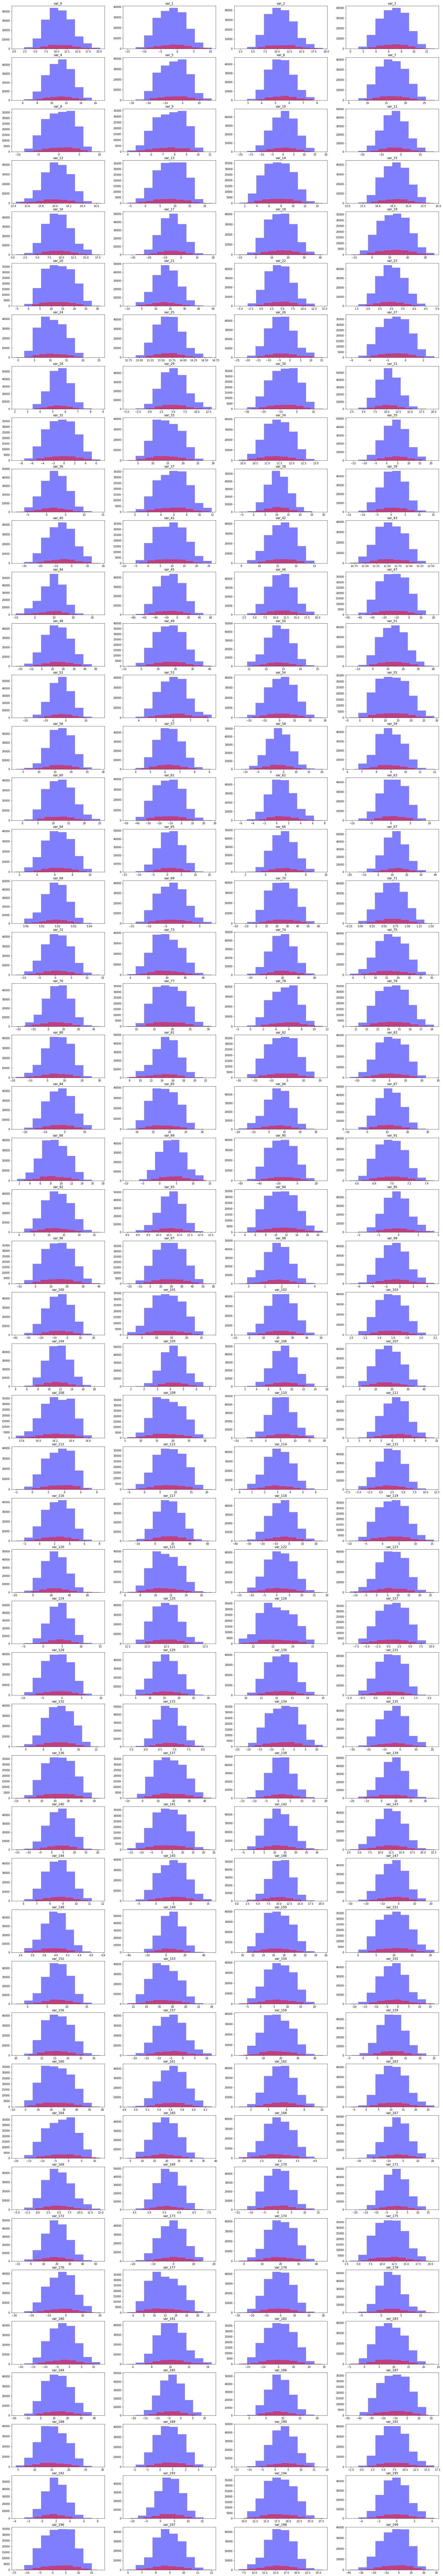

In [16]:
print('Distributions columns')
plt.figure(figsize=(30, 185))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 4, i + 1)
    plt.hist(Train[Train["target"] == 0][col], alpha=0.5, label='0', color='b')
    plt.hist(Train[Train["target"] == 1][col], alpha=0.5, label='1', color='r')    
    plt.title(col)
gc.collect();

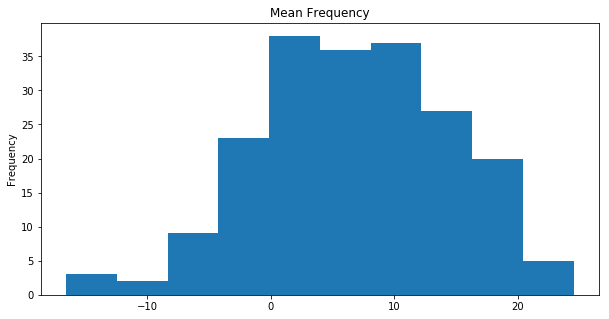

In [18]:
plt.figure(figsize=(10, 5))
Train[numerical_features].mean().plot('hist');
plt.title('Mean Frequency');

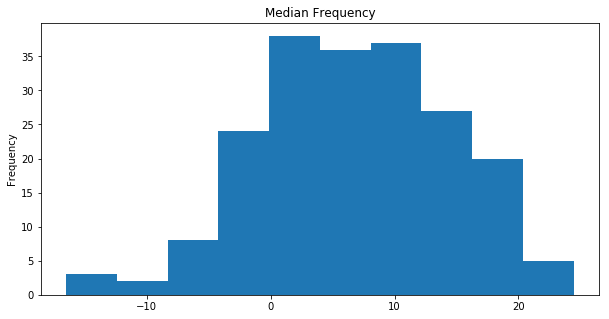

In [19]:
plt.figure(figsize=(10, 5))
Train[numerical_features].median().plot('hist');
plt.title('Median Frequency');

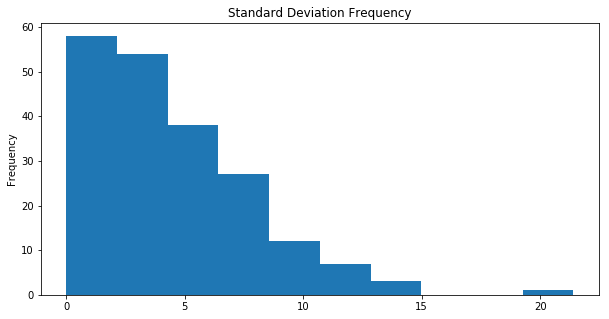

In [20]:
plt.figure(figsize=(10, 5))
Train[numerical_features].std().plot('hist');
plt.title('Standard Deviation Frequency');

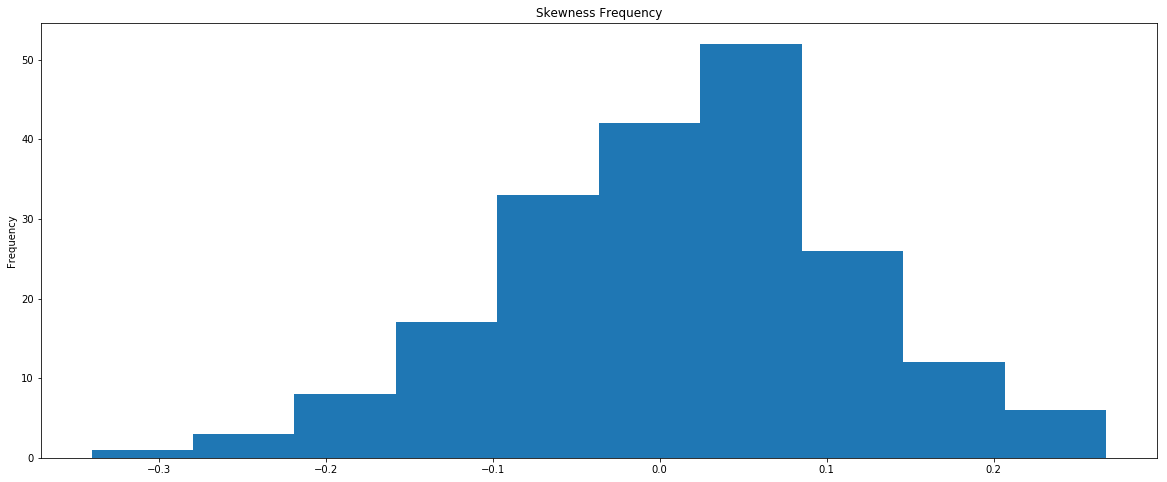

In [21]:
plt.figure(figsize=(10, 4))
Train[numerical_features].skew().plot('hist');
plt.title('Skewness Frequency');

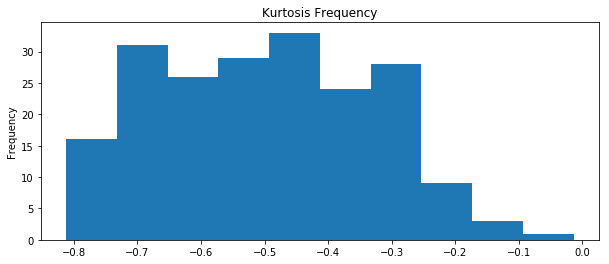

In [22]:
plt.figure(figsize=(10, 4))
Train[numerical_features].kurt().plot('hist');
plt.title('Kurtosis Frequency');

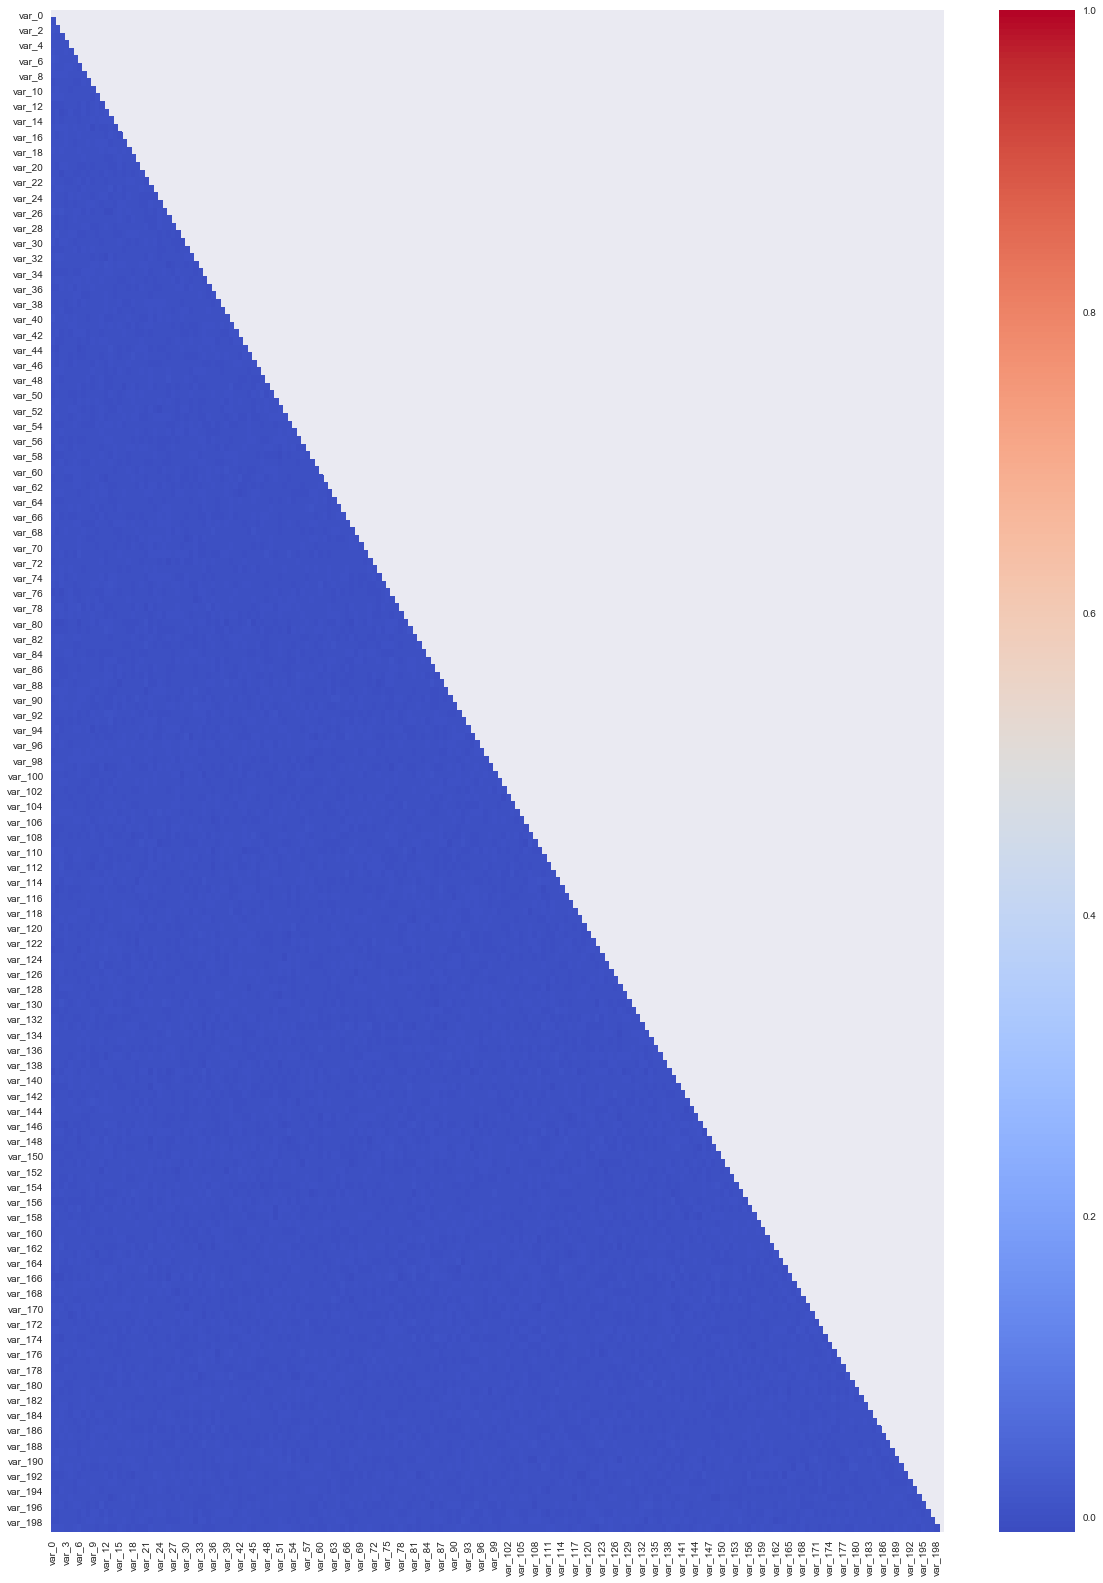

In [12]:
# Correlation

import seaborn as sns
sns.set(rc={'figure.figsize':(20,28)})

# Compute the correlation matrix
corr = Train[numerical_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            #annot=True, 
            #fmt=".2f", 
            cmap='coolwarm')

In [28]:
Train.shape

(200000, 202)

In [14]:
# Standardisation

for i in numerical_features:
     print(i)
     Train[i] = (Train[i] - Train[i].mean())/Train[i].std()



var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_10
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136
var_137
var_13

(array([2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00,
        6.000e+00, 5.000e+00, 1.000e+01, 7.000e+00, 1.000e+01, 1.600e+01,
        1.500e+01, 2.500e+01, 3.600e+01, 3.700e+01, 4.900e+01, 5.700e+01,
        5.200e+01, 8.000e+01, 1.080e+02, 1.400e+02, 1.640e+02, 1.990e+02,
        2.260e+02, 2.630e+02, 3.140e+02, 3.630e+02, 4.390e+02, 4.550e+02,
        5.460e+02, 6.020e+02, 6.910e+02, 8.250e+02, 8.720e+02, 1.026e+03,
        1.062e+03, 1.212e+03, 1.280e+03, 1.496e+03, 1.614e+03, 1.712e+03,
        1.834e+03, 2.010e+03, 2.145e+03, 2.195e+03, 2.445e+03, 2.437e+03,
        2.689e+03, 2.875e+03, 2.846e+03, 3.001e+03, 3.157e+03, 3.129e+03,
        3.330e+03, 3.327e+03, 3.389e+03, 3.379e+03, 3.473e+03, 3.570e+03,
        3.482e+03, 3.604e+03, 3.494e+03, 3.640e+03, 3.714e+03, 3.696e+03,
        3.524e+03, 3.631e+03, 3.539e+03, 3.488e+03, 3.532e+03, 3.475e+03,
        3.466e+03, 3.326e+03, 3.447e+03, 3.286e+03, 3.311e+03, 3.124e+03,
        3.195e+03, 3.073e+03, 3.016e+0

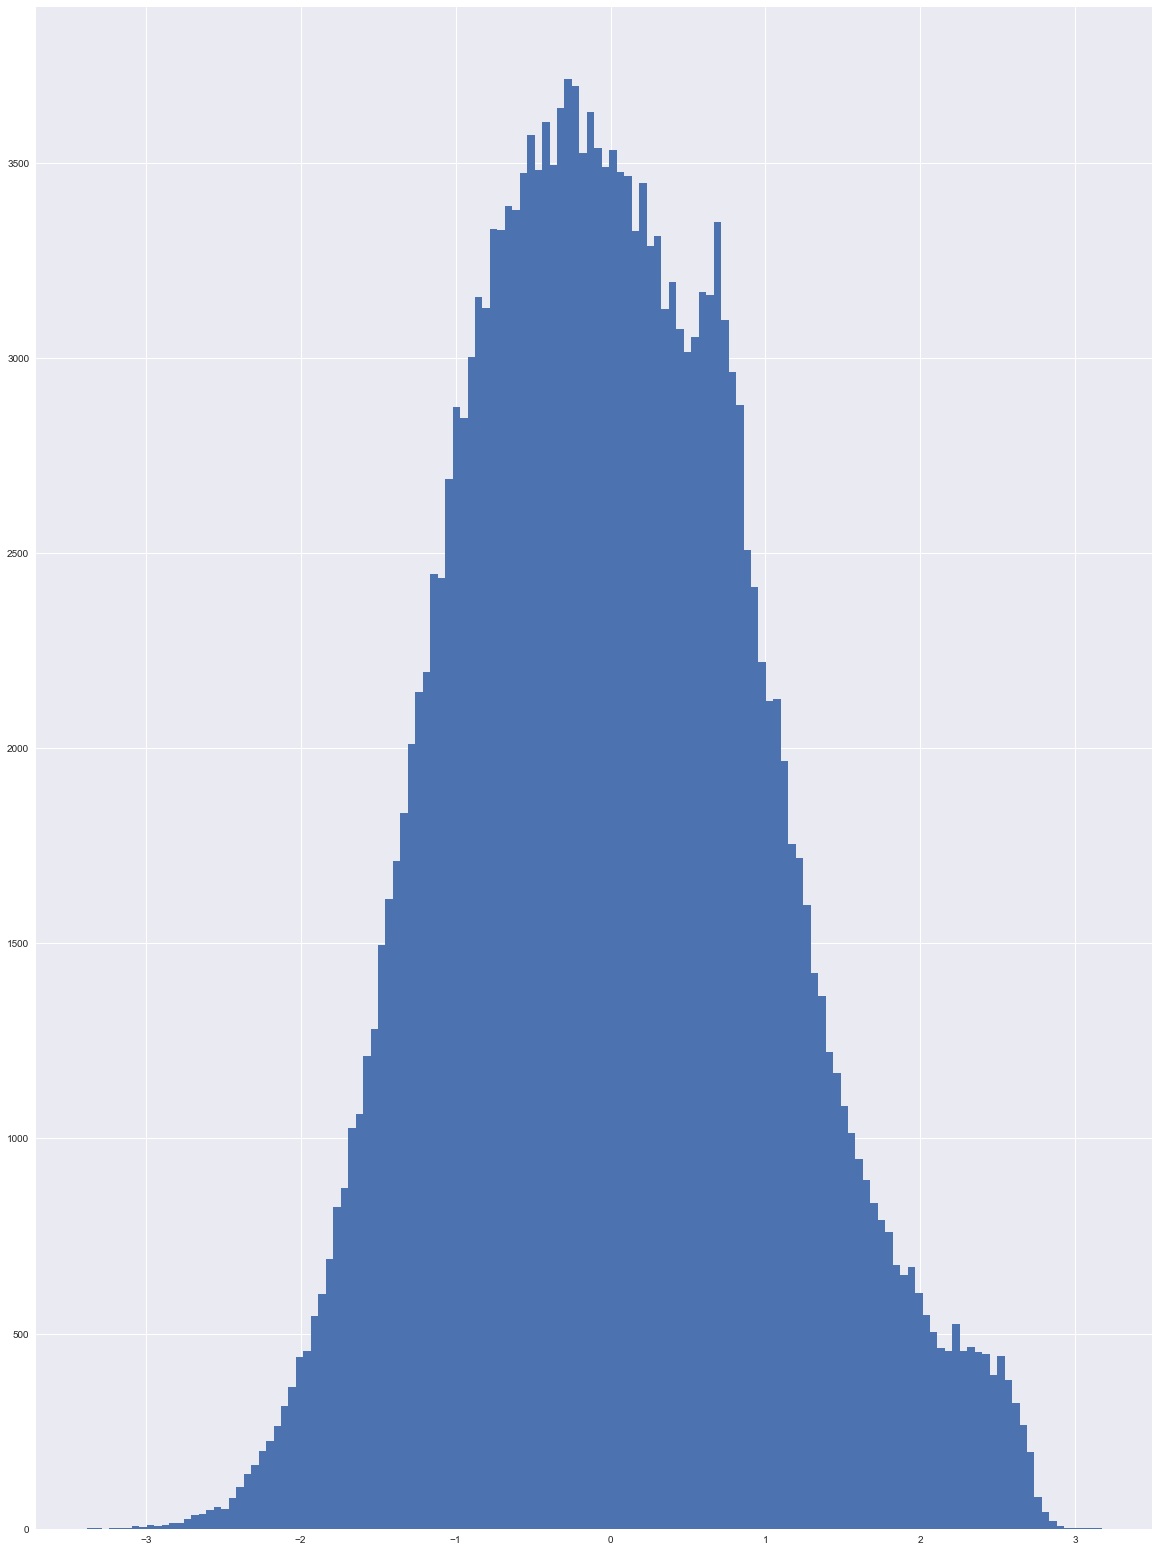

In [32]:
plt.hist(Train['var_0'], bins='auto')


In [15]:
train_logit = pd.DataFrame(Train['target'])


In [16]:
train_logit = train_logit.join(Train[numerical_features])


In [36]:
# for check

Sample_Index = np.random.rand(len(train_logit)) < 0.8

train = train_logit[Sample_Index]
test = train_logit[~Sample_Index]


In [ ]:
import statsmodels.api as sm

train_cols = Train.columns[2:30]
logit = sm.Logit(Train['target'], Train[train_cols]).fit()


In [37]:
#for check

test['Actual_prob'] = logit.predict(test[train_cols])

test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0


E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\anaconda\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [19]:
Test['Actual_prob'] = logit.predict(Test[train_cols])

Test['ActualVal'] = 1
Test.loc[Test.Actual_prob < 0.5, 'ActualVal'] = 0


In [20]:
Test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,Actual_prob,ActualVal
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,0.645194,1
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760,0.888698,1
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794,0.380566,0
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108,0.440712,0
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846,0.871026,1


In [41]:
CM = pd.crosstab(test['target'], test['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
#((TP+TN)*100)/(TP+TN+FP+FN)

#check Precision
#(TP/(TP+FP))

#Check Recall
#(TP/(TP+FN))

#False Negative rate 
#(FN*100)/(FN+TP)

#Precision= 14.69
#Recall = 71.40
#FNR=-------------------28.621
#ACCURACY=--------------55.28 

28.909718796250615

In [21]:

#Decision Tree

#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [22]:
X = Train.values[:, 2:202]
Y = Train.values[:,1]
Y = Y.astype('int')

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [24]:
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)


In [25]:
#predict new test cases
C50_Predictions = C50_model.predict(X_test)

In [29]:
CM = pd.crosstab(y_test, C50_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
#((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#check Precision
#(TP/(TP+FP))

#Check Recall
(TP/(TP+FN))


#Results
#Recall: 19.29
#Precision: 18.68
#Accuracy: 83.63
#FNR: 80.71


0.19903264812575575

In [31]:
df = tree.export_graphviz(C50_model, out_file= None, feature_names = Train.columns[2:202])


In [32]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)



In [33]:
RF_Predictions = RF_model.predict(X_test)


In [35]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
#((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#check Precision
#(TP/(TP+FP))

#Check Recall
(TP/(TP+FN))

#Accuracy: 90
#FNR: 99.42
#Recall:0.5
#precision:74.19


0.0065296251511487305